<a href="https://colab.research.google.com/github/JuanDM0106/Tesis/blob/master/SG_Repository.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

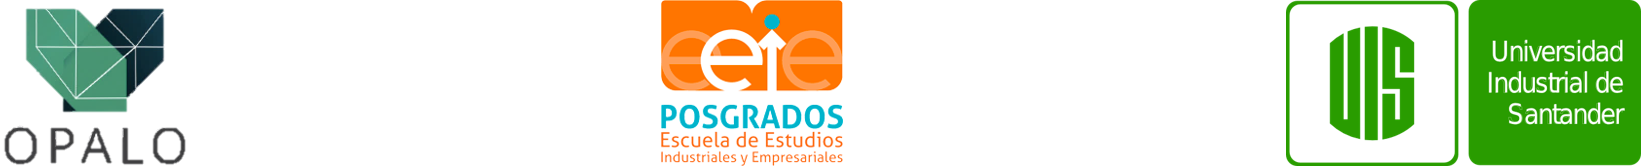

In [ ]:
#@title
Image("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Logos.png", width=950, height=100)

**<h1><center> Scenario Generation Repository Book </center></h1>**

<p align="justify"> This repository book allows the accessibility of the data processed online and serves as a guideline for future research based on uncertain parameter analysis. Therefore, the objective of this short repository is to develop a brief analysis of weather parameter behavior and to provide differents path-based methods for scenario generation. The main parameters analyzed are precipitation, temperature, and humidity. For modeling and practical processing purposes, only the monthly data is analyzed, due to CropWat 8.0 software requirements. The data used are available on the NASA website. <a href="https://power.larc.nasa.gov/data-access-viewer/"> Click here to check out NASA cliamtic database.

**First Author: Juan David Márquez González <br>**
**M.Sc(c) Industrial Engineering <br>**
<br>
**Second Author: Leonardo Hernán Talero Sarmiento <br>**
**M.Sc(c) Industrial Engineering <br>**
<br>
**Universidad Industrial de Santander**


***

**<h2><center> R-Studio and Python Required Packages </center></h2>**

This section contains all R-studio and Python required packages for the right development of the repository book.

### **R-Studio**

In [6]:
%%capture
%%R
install.packages("readxl")
install.packages("ggplot2")
install.packages("forecast")
install.packages("urca")
install.packages("scales")
install.packages("extrafont")
install.packages("cowplot")
install.packages("lmtest")
install.packages("TSA")
install.packages("astsa")
install.packages("WriteXLS")

In [7]:
%%capture
%%R
library(ggplot2)   # Library for graphics
library(readxl)    # Library that support .xls read documents
library(forecast)  # Library used for imput data
library(urca)      # Library applied for running Unit-Root statistical tests
library(lmtest)    # libreria para aplicar prueba Durbin-Watson
library(scales)    # Library for scaling data
library(extrafont) # For graphics
library(TSA)       # Library for periodograms
library(astsa)     # Library for SRIMA models
library(cowplot)   # Library for multiples ggplot2 plots
library(WriteXLS)  # Library for saving data into .xlxs extension

### **Python**

In [8]:
# Python
from IPython.display import Image
import pandas as pd
import xlrd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### **Softwares use considerations**

The present section applies commands in the repository to carry out practical work and processes using both softwares (R-studio and Python).

#### **R-Studio**

In [1]:
# Run for R-studio in Colab
%load_ext rpy2.ipython

In [2]:
# Do not show warning mesagess
%%R 
options(warn=-1)

#### **Python**


In [ ]:
import warnings
warnings.filterwarnings("ignore")

***

**<h2><center> Time-Series Analysis Brief Introduction </center></h2>**

Before proceeding to develop time-series analysis, we will first address general concepts and characteristics.<br>

**<p align="justify">
Definition:** A time-series represents the collection of observations of a variable gathered sequentially in time (i.e., hours, days, weeks, months, years). Time-series can be multivariate (one dependent variable and more than one independent) or univariate (lag-dependent variable).<p>

**<p align="justify">
What is the relevance of understanding time-series?:** It allows us to understand how the phenomenon behaves based only on the data collected temporarily and make assumptions or decide how to carry out the data analysis using proper and pertinent strategies for data modeling.<p> 

 **Time-series analysis goals:** 
1.   Descriptive analysis (trends, stationarity, seasonality, randomness, outliers, autocorrelated)
2.   Forecasting
3.   Scenario Generation (Uncertain Analysis path-base methods)



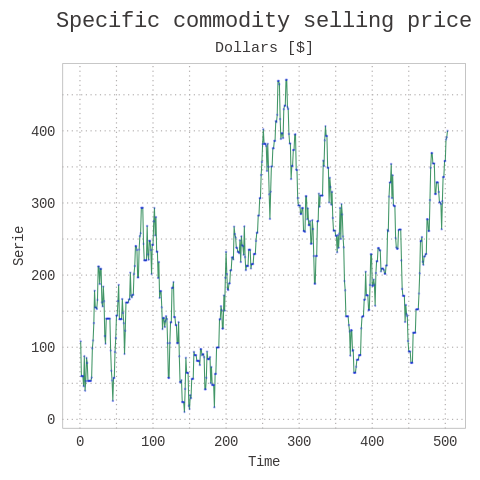

In [9]:
#@title ##### **Time-Series Example:** The following temporal plot shows a certain time-series behavior
%%R
Data=read_excel("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/DSampling.xlsx")
Data=data.frame(Data)
ggplot(Data, aes(x=Time, y=Serie) ) + geom_line(alpha = 0.9, color ="seagreen")+ labs(title="Specific commodity selling price", 
         subtitle="Dollars [$]")+ theme_elegante()+geom_point(alpha = 0.2, color ="blue", size=0.6)

Time-series presents primarily three main sources of variability **components** that analysts deal with:
<br>
<br>
$$ Y(t)= T(t) + Sy(t) + R(t) $$
<br>

**Trend - T(t):** Change in the long-term behavior of the data mean. It can influence an increase or decrease in the data mean. <br>
**Seasonality - S(t):** Certain patterns in the data behavior present always at specific points in time. <br>
**Randomness - R(t):** Also called noise, they represent the random part present in time-series.

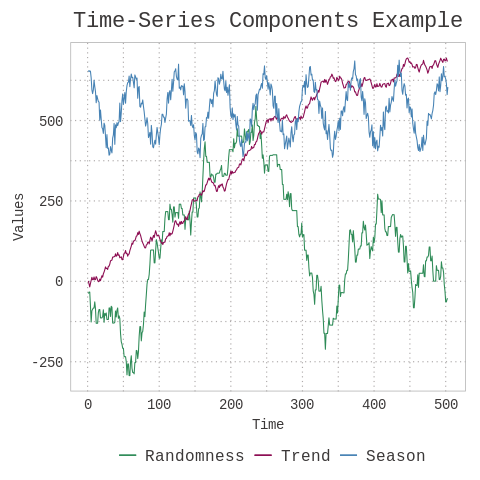

In [10]:
#@title ##### **Time-Series Example:** The following temporal plot shows time-series components example
%%R
colors <- c("Randomness" = "seagreen", "Trend" = "deeppink4", "Season" = "steelblue")
ggplot(Data, aes(x=Time)) +  labs(title="Time-Series Components Example", x = "Time" , y = "Values", color="Legend")+
         geom_line(aes(y=Randomness, color ="Randomness"))+
         geom_line(aes(y = Trend, color="Trend"))+
         geom_line(aes(y = Season, color="Season"))+
         theme_elegante()+scale_color_manual(values = colors)

### **Stochastic Processes**

<p align="justify">Time-series usually represent a kind of stochastic processes relating a collection or family of ordered continuous or discrete random variables (RV) dependent on time (Gujarati & Porter, 2010). Every random variable contained in the process typically presents a unique probability distribution. A RV represents a numerical value that is impossible to know in advance and can only be analyzed once it has occurred. The previous generates difficulties for decision-makers or analysts, considering that a specific parameter, being precisely unknown, generates highly risky decision-making and therefore reductions in benefits.<p> 

Stochastic processes present two groups according to probabilistic properties, stationary and non-stationary processes.

**<p align="justify">1.   Non-Stationary stochastic process:** A stochastic process is non-stationary if the probability distribution associated with the RVs changes in the period analyzed.<p>

**<p align="justify">2.   Stationary stochastic process:** On the contrary, a stochastic process is stationary where some (or all) probability distribution moments are constant at all temporal positions. There are two main types of stocastic stationary processes related to the assumptions of moments invariance:
<ul>
<li> <p align="justify"> Strict/Strictly stochastic stationary processes: They are processes where all the probability distribution moments are constant or invariant in time. However, guaranteeing invariance at all moments is usually complicated. Therefore, weak stationary processes appears as alternative for modeling purposes.<p> </li> 

<li> <p align="justify"> Wide-sense stochastic stationary processes: They are processes that meet the following characteristics.

$$ E(Y_t)=\mu $$
$$ Var(Y_t)=\sigma^{2} $$
$$ Cov(Y_t)=E[Y_t-\mu)(Y_{t+k}-\mu)]=\gamma_t $$ <br>
**Note:** The covariance only depends on the realiza-tions of the random variables.

</li>
<p>
</ul>

<p align="justify"> The following graphs allow explaining the differences between a stationary and non-stationary stochastic process. In the first graph (non-stationary process), the RV in each time cut holds different probability distributions (see the distribution form). In the second graph (stationary process), we can see that the probability distribution is constant, generating less risky models, understanding that particular data characteristics are invariant.
<p>

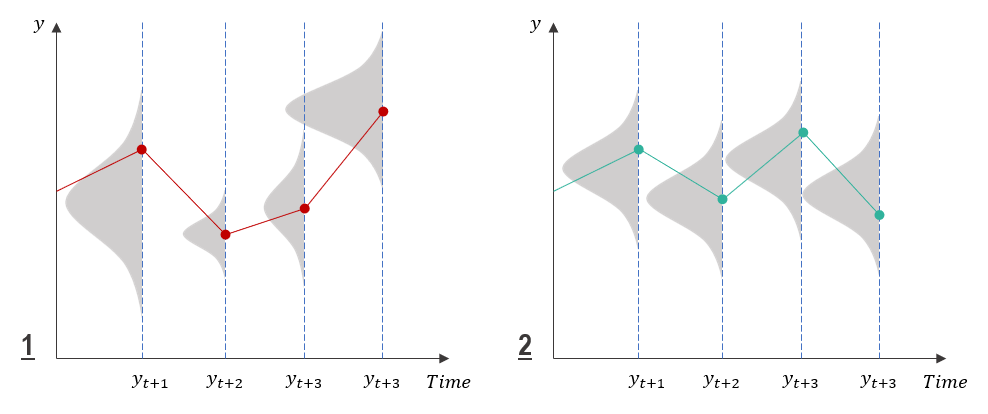

In [11]:
#@title
Image("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Imagenes/Estacionario y no estacionario.PNG", width=800, height=350)

<p align="justify">The following plots show some types of stochastic processes. Plot A presents a stochastic process or random walk (completely random process). Plots b and c are stationary processes, where b is a mean stationary process, and c is a wide-sense stationary.<p>

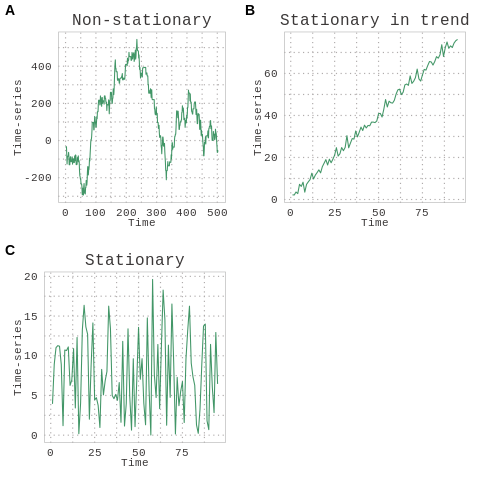

In [12]:
#@title ##### **Stochastic time-series**
%%R
Data=read_excel("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/DSampling.xlsx")
Data2=read_excel("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Stationary.xlsx")
Data=data.frame(Data)
Data2=data.frame(Data2)
p1<-ggplot(Data, aes(x=Time, y=Randomness) ) + geom_line(alpha = 0.9, color ="seagreen")+ labs(title="Non-stationary", y="Time-series")+ 
          theme_elegante(base_size = 13)+theme(plot.title=element_text(size=16))
p2<-ggplot(Data2, aes(x=Time, y=Trend) ) + geom_line(alpha = 0.9, color ="seagreen")+ labs(title="Stationary in trend", y="Time-series")+ 
          theme_elegante(base_size = 13)+theme(plot.title=element_text(size=16))
p3<-ggplot(Data2, aes(x=Time, y=Stat) ) + geom_line(alpha = 0.9, color ="seagreen")+ labs(title="Stationary", y="Time-series")+ 
          theme_elegante(base_size = 13)+theme(plot.title=element_text(size=16))

plot_grid(p1, p2, p3, labels = c('A', 'B', 'C'))

#### **Random walk processes** 

<p align="justify"> The following tests (unit-roots) evaluate the presence of random processes in the series. These data behaviors are known as random walk models, and three are mainly considered (pure, with drift and with drift and trend); these processes present particular behaviors in the series, which can be visualized through line graphs and verified with statistical tests. If a historical series does not demonstrate these behaviors, we would be dealing with stationary series.<p>
<br>

RW pure:  $${Y}_{t}={Y}_{t-1}+u_{t}$$ 
RW with drift: $${Y}_{t}=\beta_{1}+\delta{Y}_{t-1}+u_{t}$$
RW with drift and trend and $${Y}_{t}=\beta_{1}+\beta_{2}{t}+\delta{Y}_{t-1}+u_{t}$$<br>

### **Stationary Analysis**

#### **Autocorrelation Function Plots**

<p align="justify">Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) are statistical indicators that allow observing the statistical correlation between variables in time. ACF enables us to identify if the serie presents autocorrelations. In contrast, PACF shows the correlation between two variables separated $k$ periods without considering the effect of the lags or intervals between them.<p>

#### **Unit-root tests**

<p align="justify">These tests (unit-roots) evaluate the presence of random processes in the series. These data behaviors are known as random walk models, and three are mainly considered (pure, with drift and with drift and trend); these processes present particular behaviors in the series, which can be visualized through line graphs and verified with statistical tests. If a historical series does not demonstrate these behaviors, we would be dealing with stationary series. In the unit-root tests, the following hypotheses are contrasted:<p>

**Ho**: *the existence of unit-root in the series*<br>
**Ha**: *non-existence of unit-root* <br>


##### **Augmented Dickey-Fuller Test**
Augmented Dickey- Fuller (1979) developed a statistical test for evaluating the unit-root existence process. The test comprises three differents parts according to certain models' characteristics.
<br>

###### **Unit-root test with drift and trend** 
<br>

$${Y}_{t}=\beta_{1}+\beta_{2}{t}+\delta{Y}_{t-1}+u_{t}$$<br>

<p align="justify">The first test consists of determining if the data present a unit-root process with drift and trend (as observed in the previous equation), where the value $\beta_{1}$ represents the intercept or derivative of the process, $\beta_{2}$ the time trend of the process, $\delta$ the root of the process, ${Y}_{t-1}$ the lagged variable, $u$ an error value or white noise (which is normally distributed with $\mu = 0$ and $\sigma^{2} = 1$, and its no correlated) associated with the model and ${t}$ is the time measured chronologically.<p>

###### **Unit-root test with drift and without trend**

$${Y}_{t}=\beta_{1}+\delta{Y}_{t-1}+u_{t}$$

<p align="justify"> The second test consists of checking if the data set presents a unit-root process with drift and without trend (as observed in the previous equation), where the value $\beta_{1}$ represents the intercept or derivative of the process, $\delta$ represents the root of the process,  ${Y}_{t-1}$ the lagged variable, $u$ an error or white noise value associated with the model and ${t}$ is the time measured chronologically. <p>

###### **Unit-root test without drift and without trend**

 $${Y}_{t}={Y}_{t-1}+u_{t}$$

<p align="justify">The third test consists of verifying if the data presents a unit-root process without drift and without trend (as observed in the previous equation), where the value $\delta$ represents the root of the process, ${Y}_{t-1}$ the lagged variable, $u$ an error value according to white noise with the model and ${t}$ is the time measured chronologically.

It should be noted that the second and third processes are adjustments to the first model or are derived from it, where the second process does not present a trend = 0 and the third does not present neither a drift = 0 nor a trend = 0.<p>

#### **Phillips-Perron Stationary test**

<p align="justify">Phillips-Perron (1986) developed a statistical test applied to time-series unit-roots identification. The test performs the same contrast as the ADF test but using non-parametric methods, which avoids the use of correlations in the residuals. The test allows identifying ramdon processes in time-series.<p>

#### **Ljung-Box test**

<p align="justify"> The Ljung-Box (1978) developed a test that evaluates the existence of autocorrelation of a data set (e.g., residuals of a statistical model) by checking the randomness of lags. It is a portmanteau test since the null hypothesis is well specified, and the alternative is vague. The hypothesis evaluates:<p>

**Ho**: Residuals distributed independently<br>
**Ha**: Residuals not independently distributed

***

### **ARIMA**

<p align="justify"> Meeting this assumption (wide-sense stationary), we can fit autoregressive models to represent the data behavior. In the autoregressive models, the most used are the autoregressive integrated moving average (ARIMA) models. These models cover the analysis of a time series probabilistic properties using three main components:<p>

**<p align="justify"> AR (Autoregressive)** - A model representation of lag dependency relationship (autocorrelation).
**<p align="justify"> I (Integrated)** - The differentiation factor of the series to make it stationary.
**<p align="justify"> MA (Moving Average)** - A model representation of observations dependency on lagged residual errors. <br>

**<p align="justify">The ARIMA** or **ARIMA ($p$, $d$, $q$)** models have a standard notation where the parameter $p$ represents the significant lags of the series, $d$ the degree of differencing, and $q$ the order of the model significant residuals.<p>

**<p align="justify"> G. P. E. Box and G. M. Jenkins (1976)** propose the next 4-step methodology to fit ARIMA models. The methodology includes identifying and estimating the parameters, evaluating the model residuals are white noise $\mu\sim{IIDN(0, \sigma^{2})}$, and predicting.<p>



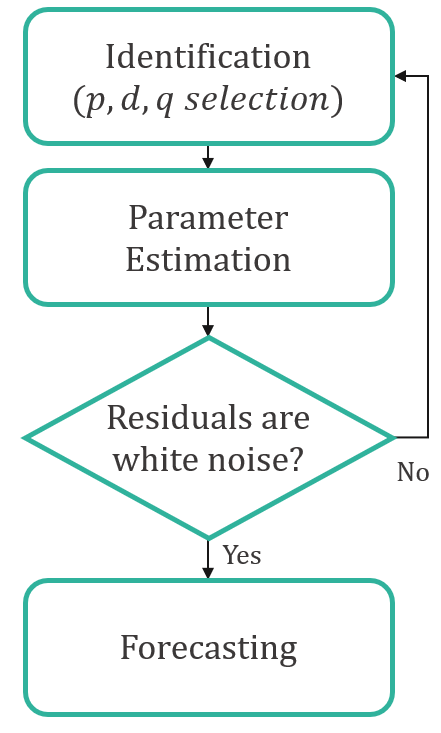

In [ ]:
#@title
Image("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Imagenes/Box-Jenkins.png", width=280, height=380)

***

### **Seasonal ARIMA**

<p align="justify"> ARIMA models are statistical models that use lagged data as predictors of the future behavior of the series. The model uses pure lagged values (parameter p), lagged residuals (parameter q) and determines if the series has stationary behavior by analyzing the number of differences required to convert it (parameter d). However, there are other components that the model does not analyze, such as seasonality, which is a process present in various time series. The Seasonal ARIMA (SARIMA) models comprise the seasonal part, with the ARIMA modeling adding three new parameters (P, D, Q) that represent the dependence of the variables with specific and repetitive points in history. This type of model allows responding to a series with patterns (e.g., higher rainfall patterns during winter periods). The terminology used is: <p>
<br>
$$SARIMA(p, d, q)(P, D, Q)m$$
<br>
$m$ represents the seasonality pattern. For the validation of the model we apply the same ARIMA methodology.



***

### **Artificial Neural Networks (feed-forward)**

<p align="justify">  An Artificial Neural Network (ANN) is an information processing paradigm based on the behavior of the human being (Yasrebi & Emami, 2008). The model comprises a large network of neurons (nodes) interconnected to generate results. A generic ANN has a three-layer structure. The first layer contains the input variables or lagged values ​​of the time series. The second or hidden layer includes the internal processing units where a function applies weights to the inputs and activates the neuron depending on the output of the activation function (see activation functions). The output layer contains the results corresponding to the variable to be forecast; these depend on the number of predicted periods and the forecasting methodology.

The feed-forward artificial neural network is an artificial multilayer network that comprises an architecture with forwarding interconnections where information flows from the input to the output layer (Svozil et al., 1997). Neural networks are models applied to identify patterns and allow data behavior to be replicated.
<p>

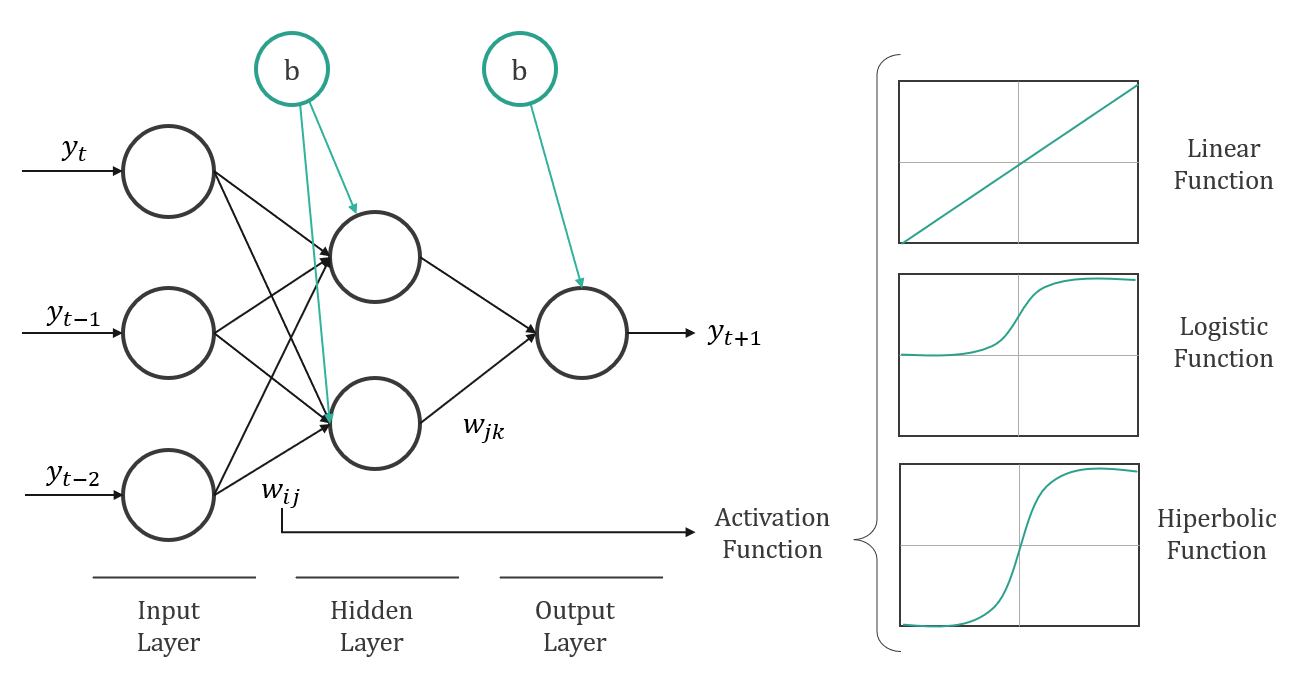

In [ ]:
#@title
Image("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Imagenes/ANN.PNG", width=900, height=420)

***

### **Hybrid model**

<p align="justify"> Zhang (2003) proposed hybrid model that comprises the modeling of the data series using the ARIMA model to represent the linear component. Under the assumption that the model allows a good fit to the linear component of the series, we can infer that the model's residuals represent the non-linear part, which an ANN allows to model, taking advantage of the non-linear modeling capabilities of this type of model. The following shoes the time-series descomposing process (also available in the following figure):

1. Time-series descomposition<br>
<br>
$$Y_t=L_t+N_t$$
<br>
2. Linear component representation and modeling (ARIMA)<br>
<br>
$$ARIMA\sim{L_t}$$
<br>
3. Non-linear component representation<br>
<br>
$$e_t=Y_t-L_t$$
<br>
4. Non-linear component modeling (ANN)<br>
<br>
$$e_t=f(e_{t-1}, e_{t-2}, e_{t-3},...,e_{t-n})+ \varepsilon_t$$
<p>

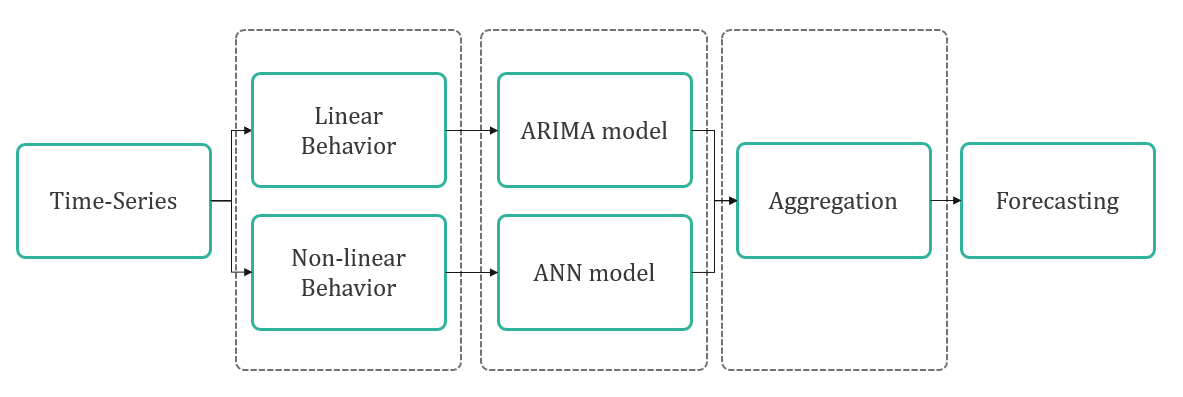

In [20]:
#@title
Image("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Imagenes/Hybrid.PNG", width=810, height=300)

***

### **Model Comparison**

<p align="justify">To evaluate the models performance, the Mean Absolute Error and Mean Squared Error metrics are usually applied. These metrics allow evaluating the performance of the model through the mean and variance of the residuals; therefore, the smaller the residuals, the better the model is.<p>

$$MAE= \frac{1}{N}\sum_{i = 1}^{N}\mid Y_i-\hat{Y}\mid$$

$$MSE= \frac{1}{N}\sum_{i = 1}^{N}(Y_i-\hat{Y})^2$$

***

**<h2><center> Descriptive Analysis of Precipitation Time-series </center></h2>**

<p align="justify">This section intent to analyze the data before proceeding to modeling, and look for identifying significant behaviors to improve the model generation process and reduce fit errors. Below appear the precipitation data scatter plot. The plot shows that the data varies between 0 and 115 [mm] approximately and the historical series does not have missing data, so it is not required to carry out imputation processes.<p>

# A tibble: 6 × 5
   TIME  YEAR MONTH   DOY PRECIPITATION
  <dbl> <dbl> <dbl> <dbl>         <dbl>
1     1  1981     1     1          0.1 
2     2  1981     1     2          0.03
3     3  1981     1     3          0.02
4     4  1981     1     4          0.01
5     5  1981     1     5          1.46
6     6  1981     1     6          2.01
# A tibble: 6 × 5
   TIME  YEAR MONTH   DOY PRECIPITATION
  <dbl> <dbl> <dbl> <dbl>         <dbl>
1 14695  2021     3    85          1.79
2 14696  2021     3    86          0.51
3 14697  2021     3    87          0.77
4 14698  2021     3    88          1.43
5 14699  2021     3    89          1.52
6 14700  2021     3    90          1.34
 PRECIPITATION    
 Min.   :  0.000  
 1st Qu.:  0.430  
 Median :  2.130  
 Mean   :  4.051  
 3rd Qu.:  5.580  
 Max.   :110.800  


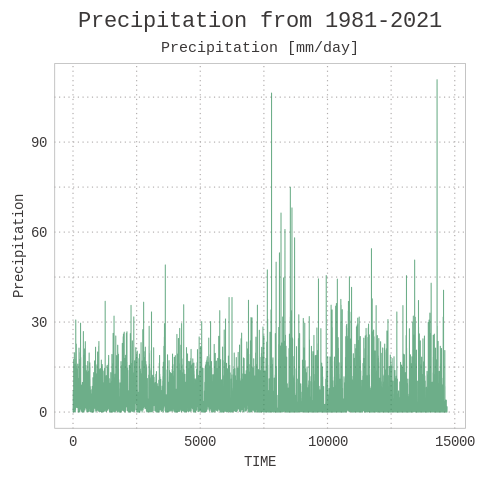

In [13]:
#@title ##### **Precipitation Time-Series**
%%R
Data=read_excel("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Precipitation/Precipitation (Daily) - 1981-2021.xlsx")
print(head(Data))
print(tail(Data))
print(summary(Data[,5]))
ggplot(Data, aes(x=TIME, y=PRECIPITATION)) + geom_line(alpha = 0.7, color ="seagreen")+theme_elegante()+labs(title="Precipitation from 1981-2021", 
         subtitle="Precipitation [mm/day]", y="Precipitation")

<p align="justify">

The following two plots shows that 75% are below 5,580 [mm], that is, the behavior of the data is mainly between 0 and 5,580 [mm].
<p>

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


4.117844520593996

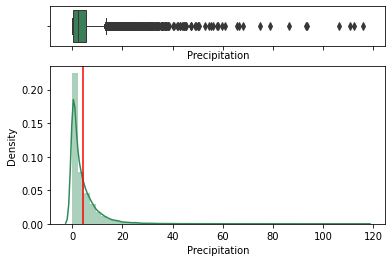

In [14]:
#@title ##### **Precipitation distribution**

D=pd.read_excel("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Precipitation.xlsx")

f, ax = plt.subplots(2,
                     sharex=True,
                     gridspec_kw={"height_ratios": (.20, .80)})

sns.boxplot(D['Precipitation'], ax=ax[0], color="seagreen", linewidth = 1)
sns.distplot(D['Precipitation'], ax=ax[1], color="seagreen")
ax[1].axvline(np.mean(D['Precipitation']), color='red')
D['Precipitation'].mean()

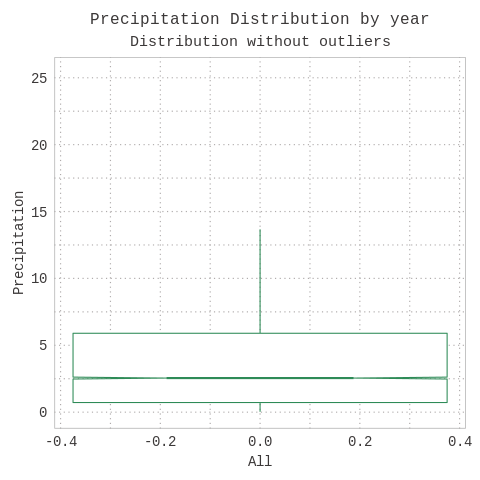

In [15]:
#@title ##### **Precipitation distribution without outliers**

%%R
ggplot(Data, aes(y=PRECIPITATION)) +
geom_boxplot(outlier.shape = NA ,color ="seagreen", notch=T)+
scale_y_continuous(limits = quantile(Data$PRECIPITATION, c(0.1, 0.99)))+
 labs(title="Precipitation Distribution by year", 
         subtitle="Distribution without outliers", 
         y="Precipitation", x="All")+theme_elegante()+theme(plot.title=element_text(size=16))

<p align="justify">The following plot allows inferring there are three behavior periods blocks, mainly. Period 1981-2000 (block 1), period 2001-2009 (block 2), period 2010-2021 (block 3). The above allows establishing that rainfall behavior has varied over the years with slightly marked rainfall frequencies. Therefore considering the first two blocks could incur imprecise models to represent the current rainfall periods.<p>

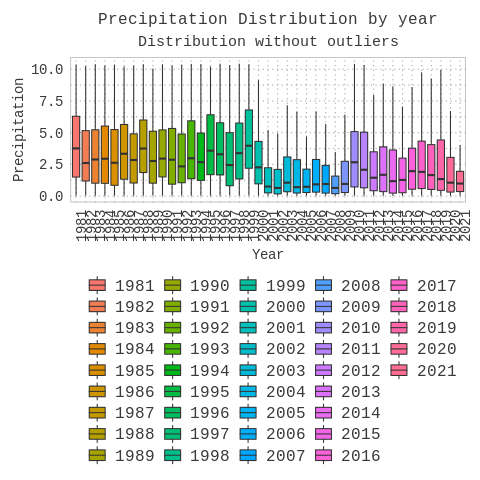

In [16]:
#@title ##### **Precipitation distribution without outliers by year**

%%R
ggplot(Data, aes(x=factor(YEAR), y=PRECIPITATION, fill=factor(YEAR))) +
 geom_boxplot(outlier.shape = NA)+
theme_elegante()+theme(axis.text.x = element_text(angle = 90, hjust = 1))+
scale_y_continuous(limits = quantile(Data$PRECIPITATION, c(0.1, 0.9)))+
 labs(title="Precipitation Distribution by year", 
         subtitle="Distribution without outliers", 
         y="Precipitation", 
         x="Year")+theme(plot.title=element_text(size=16))

   TIME YEAR MONTH DOY PRECIPITATION
1 10593 2010     1   1             0
2 10594 2010     1   2             0
3 10595 2010     1   3             0
4 10596 2010     1   4             0
5 10597 2010     1   5             0
6 10598 2010     1   6             0


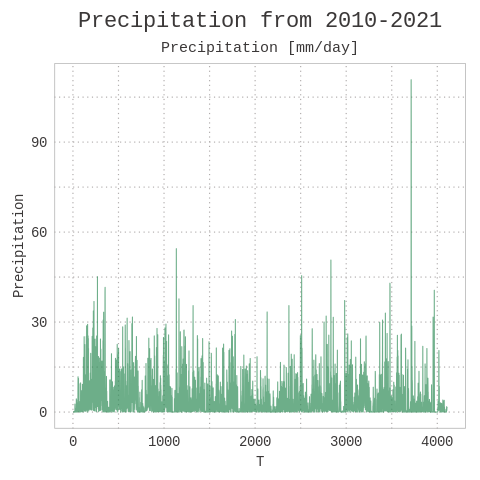

In [17]:
#@title ##### **Precipitation time-series subset (2010-2021)**
%%R
T<-c(1:4108)
Data1<-data.frame(subset(Data,YEAR>=2010))
print(head(Data1))
ggplot(Data1, aes(x=T, y=PRECIPITATION)) + geom_line(alpha = 0.7, color ="seagreen")+theme_elegante()+labs(title="Precipitation from 2010-2021", 
         subtitle="Precipitation [mm/day]", y="Precipitation")

<p align="justify">The precipitation time-series is divided into years and months for a more detailed analysis. We can observe in the series that although there are data where precipitation can reach high levels (possibly outliers), the series behavior mainly ranges from 0 to 30 [mm], regardless of the analyzed period. The foregoing could show a wide-sense stationary behavior in the series.<p>

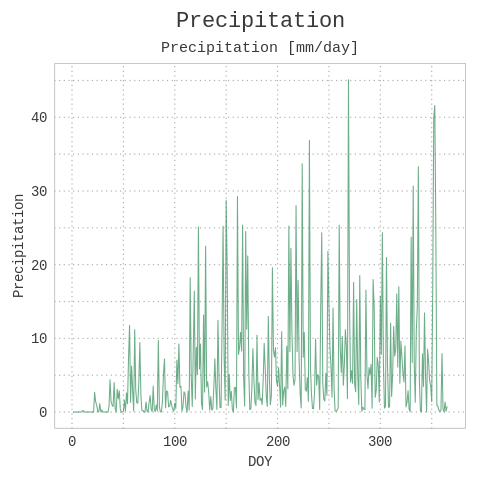

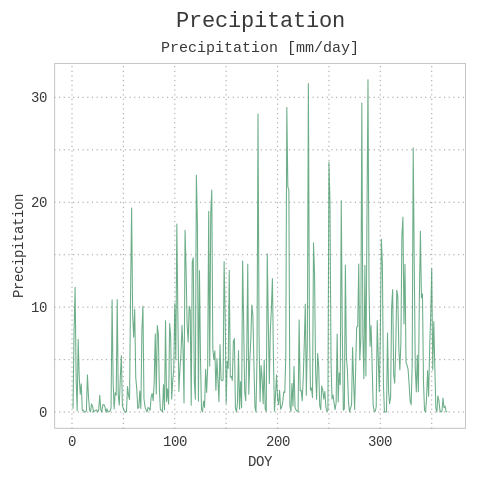

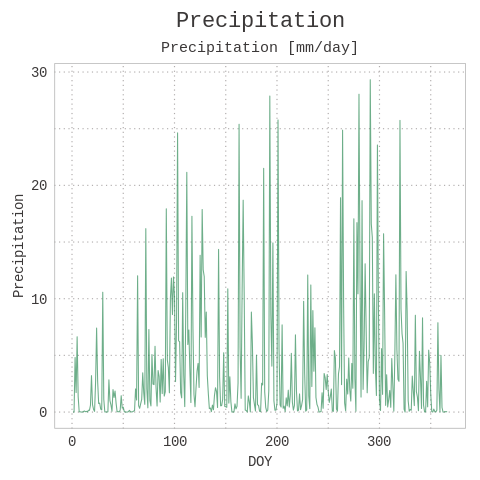

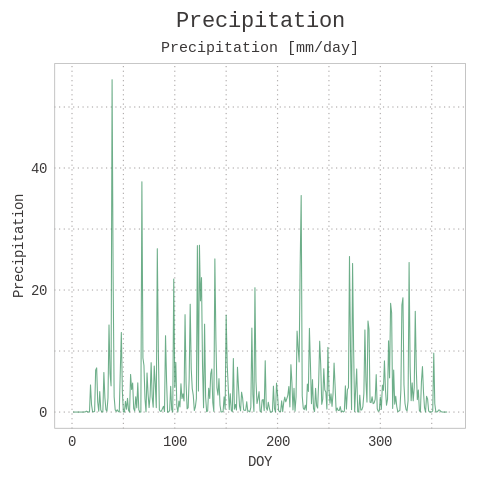

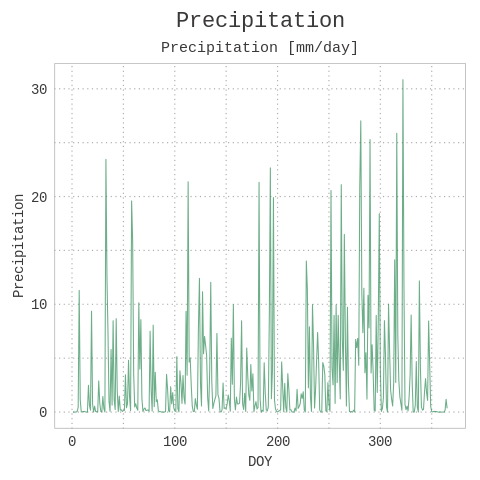

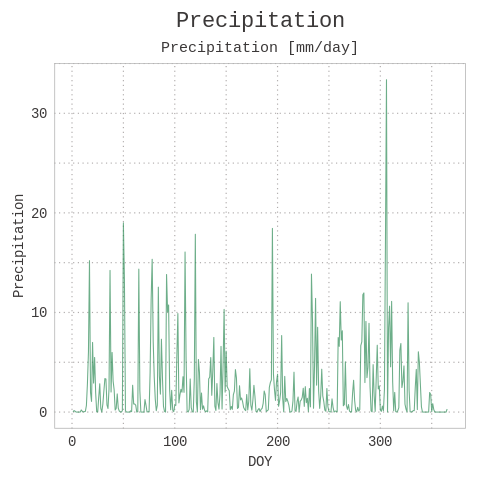

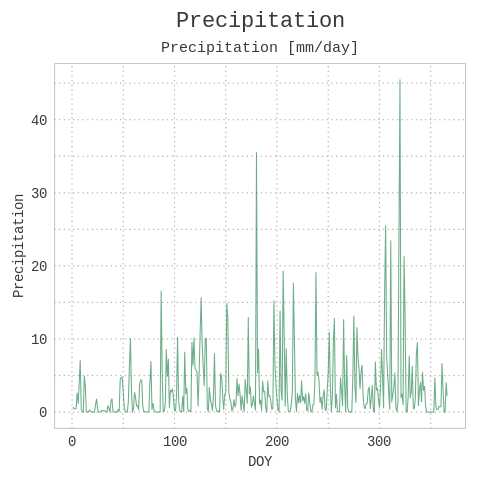

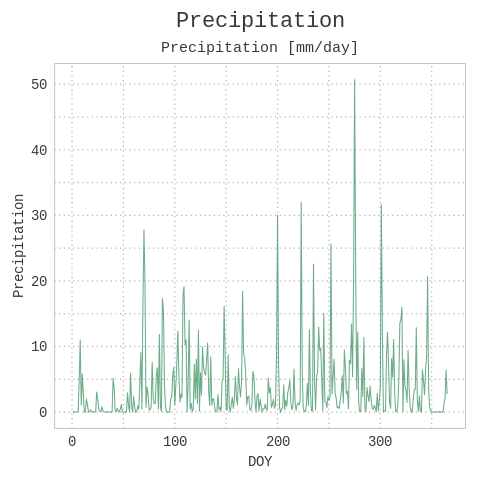

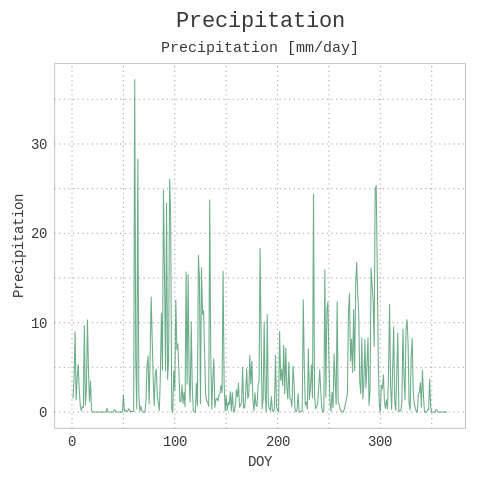

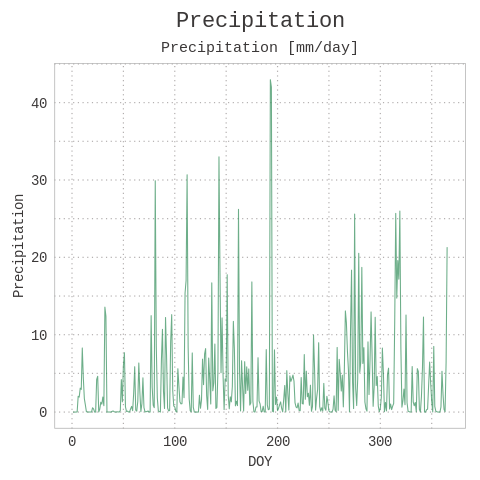

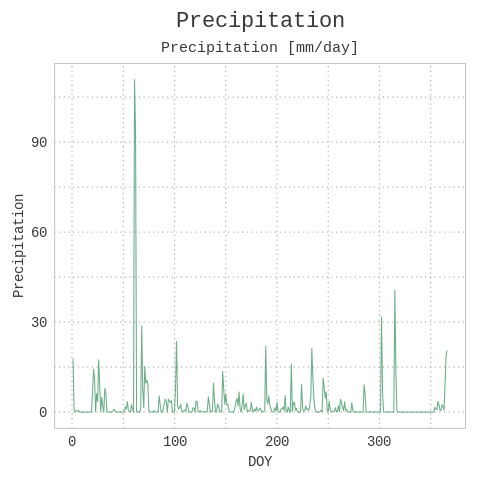

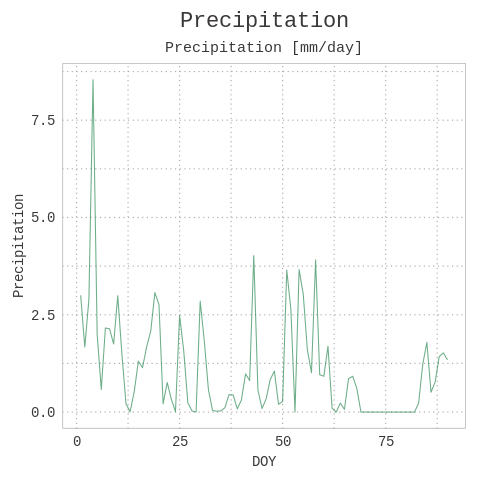

In [18]:
#@title ##### **Precipitation Time-Series every year**
%%R
for (i in 2010:2021){
     d<-data.frame(subset(Data,YEAR==i))
     gp<-ggplot(d, aes(x=DOY, y=PRECIPITATION)) + geom_line(alpha = 0.7, color ="seagreen")+theme_elegante()+labs(title="Precipitation", 
         subtitle="Precipitation [mm/day]", y="Precipitation")
     #print(c(mean(d$PRECIPITATION), "Mean"))
     #print(c(sd(d$PRECIPITATION), "Standard Deviation"))
     plot(gp)
}

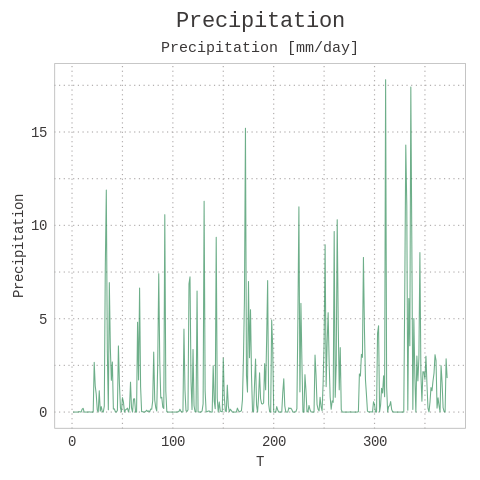

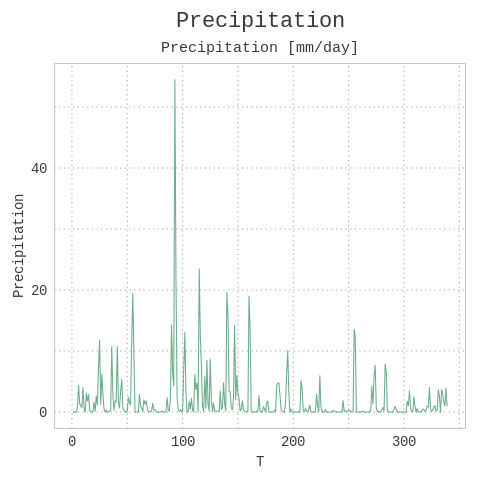

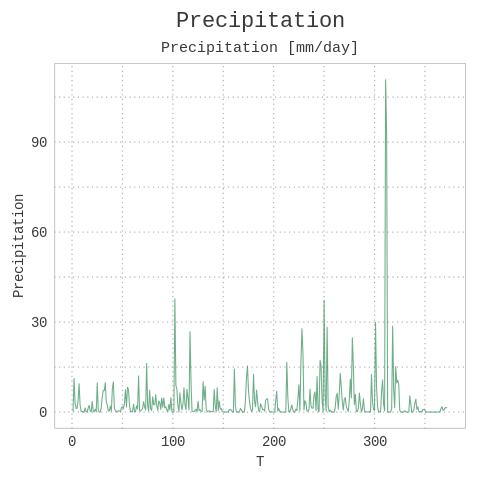

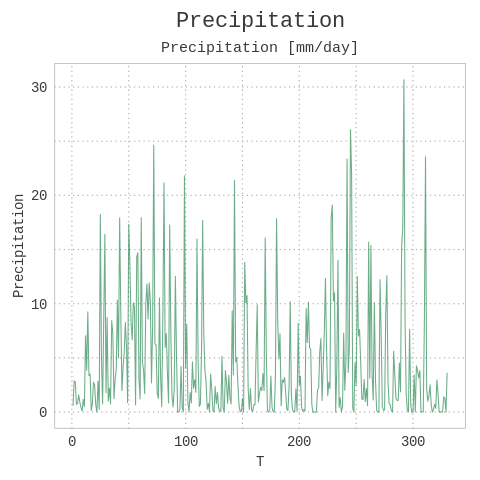

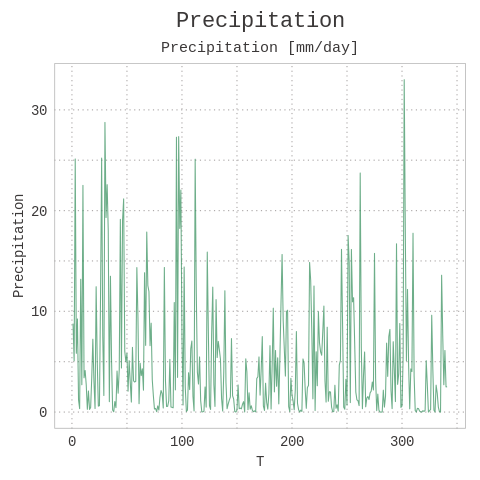

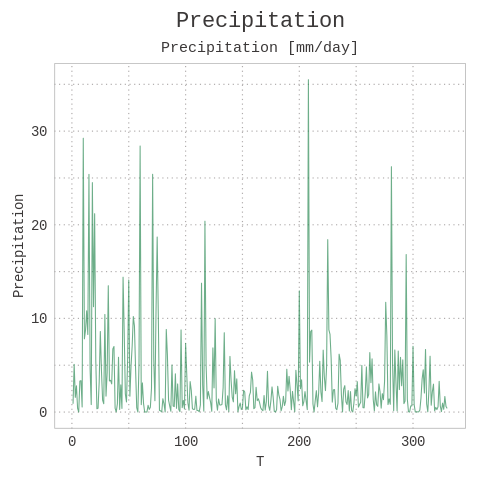

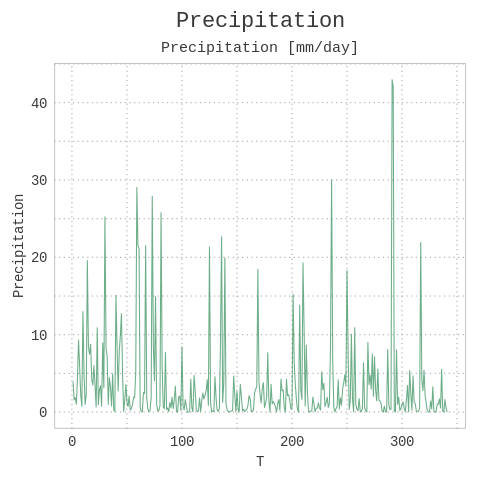

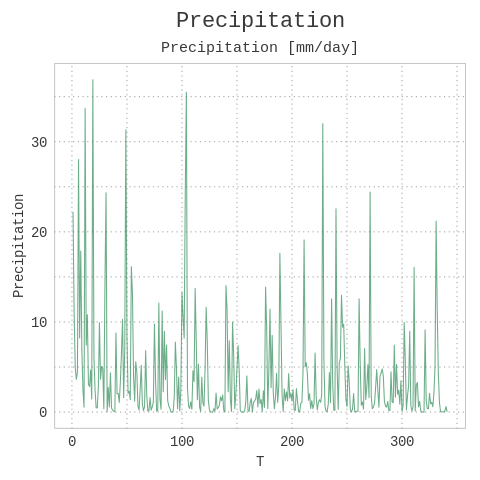

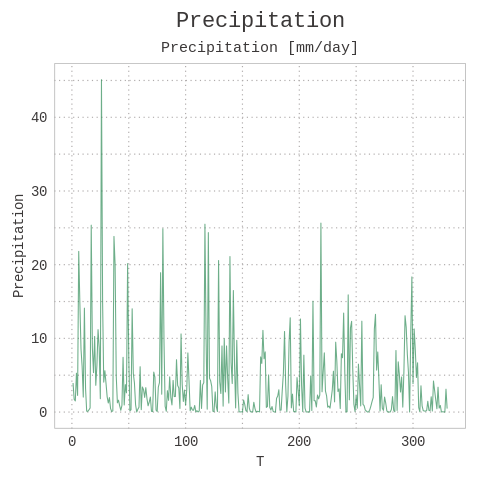

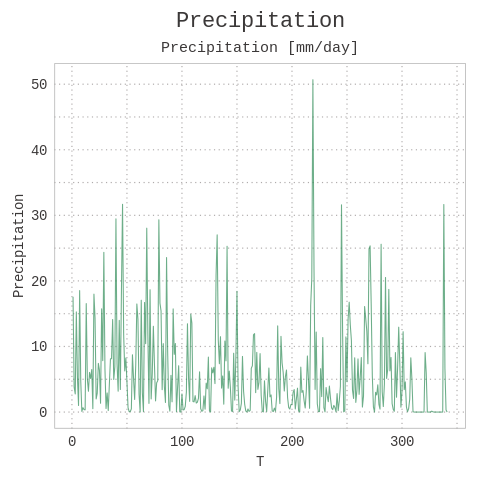

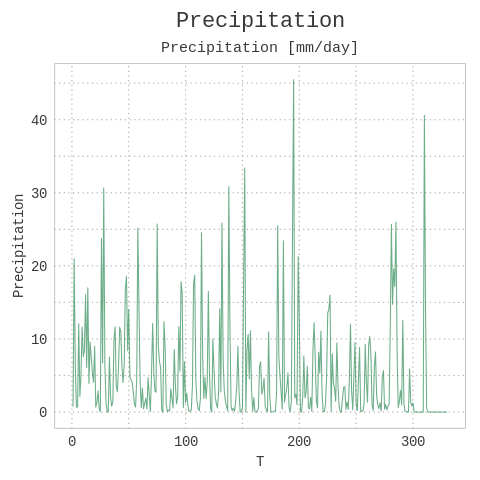

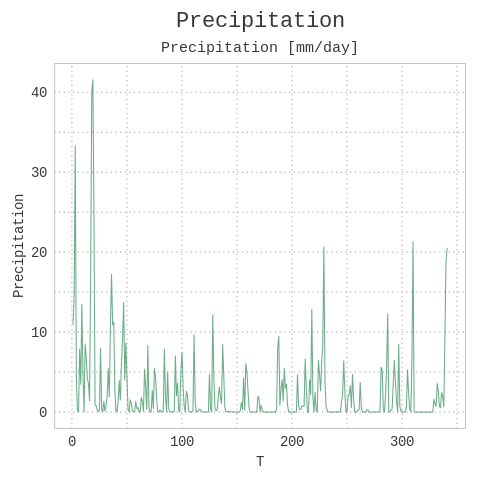

In [21]:
#@title ##### **Precipitation time-series 2010-2021 by month**
%%R
for (i in 1:12){
     d<-data.frame(subset(Data1,MONTH==i))
     T<-c(1:nrow(d[1]))
     gp1<-ggplot(d, aes(x=T, y=PRECIPITATION)) + geom_line(alpha = 0.7, color ="seagreen")+theme_elegante()+labs(title="Precipitation", 
         subtitle="Precipitation [mm/day]", y="Precipitation")
     plot(gp1)
}

<p align="justify"> The following plot confirms that precipitation data can be stationary since the mean and the variance are almost constant over time.
<p>

# A tibble: 6 × 8
   TIME  YEAR MONTH   DOY PRECIPITATION RMEAN    SD   RSD
  <dbl> <dbl> <dbl> <dbl>         <dbl> <dbl> <dbl> <dbl>
1     1  2010     1     1             0     0     0     0
2     2  2010     1     2             0     0     0     0
3     3  2010     1     3             0     0     0     0
4     4  2010     1     4             0     0     0     0
5     5  2010     1     5             0     0     0     0
6     6  2010     1     6             0     0     0     0


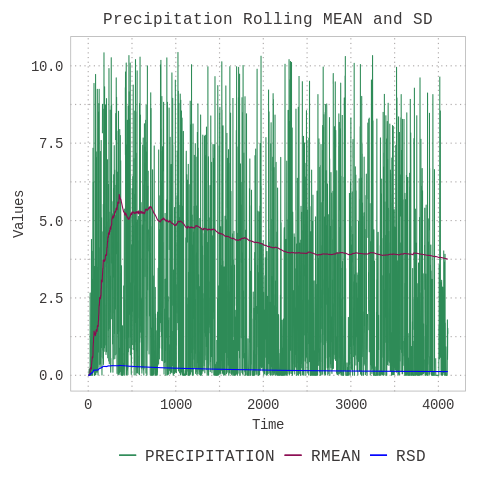

In [22]:
#@title ##### **Precipitation Time-Series. Rolling MEAN and Rolling SD**

%%R
RD=read_excel("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/Precipitation/P.xlsx")
print(head(RD))

colors <- c("PRECIPITATION" = "seagreen", "RMEAN" = "deeppink4", "RSD" = "blue")
ggplot(RD, aes(x=TIME)) +  labs(title="Precipitation Rolling MEAN and SD", x = "Time" , y = "Values", color="Legend")+
         geom_line(aes(y=RD$PRECIPITATION, color ="PRECIPITATION"))+
         geom_line(aes(y = RD$RMEAN, color="RMEAN"))+
         geom_line(aes(y = RD$RSD, color="RSD"))+
         theme_elegante()+scale_color_manual(values = colors)+scale_y_continuous(limits = quantile(RD$PRECIPITATION, c(0.1, 0.9)))+
         theme(plot.title=element_text(size=16))

<p align="justify">  First of all, the dataset is divided into two subsets, the first one for the training or fitting process and the second one for test modeling. Stationarity analysis are applied to the data train to determine its behavior and the requirement to differentiate the series (make it stationary).In this case, the training set constitutes the dataset for the 2010-2020 period, and the test data for the first month of the year 2021 (January).<p>

In [23]:
%%R
TIME<- c(1:4108)
Data1[,1]<-TIME # Reestructuring TIME variable

In [24]:
%%R
Datam<-Data1[1:4018,]    # Data for modeling (training/fitting)
Datap<-Data1[4018:4049,] # Data for forecasting (testing)
print(head(Datam))
print(head(Datap))

  TIME YEAR MONTH DOY PRECIPITATION
1    1 2010     1   1             0
2    2 2010     1   2             0
3    3 2010     1   3             0
4    4 2010     1   4             0
5    5 2010     1   5             0
6    6 2010     1   6             0
     TIME YEAR MONTH DOY PRECIPITATION
4018 4018 2020    12 366         20.51
4019 4019 2021     1   1          3.00
4020 4020 2021     1   2          1.67
4021 4021 2021     1   3          2.90
4022 4022 2021     1   4          8.54
4023 4023 2021     1   5          2.00


### **Stationary Analysis**

#### **Autocorelation Plots**

<p align="justify">  The following plot shows little correlation between the lagged values, so the data does not depend highly on the history (short memory). This above means that the data can be influenced by randomness.<p>

R[write to console]: Loading required package: dplyr

R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




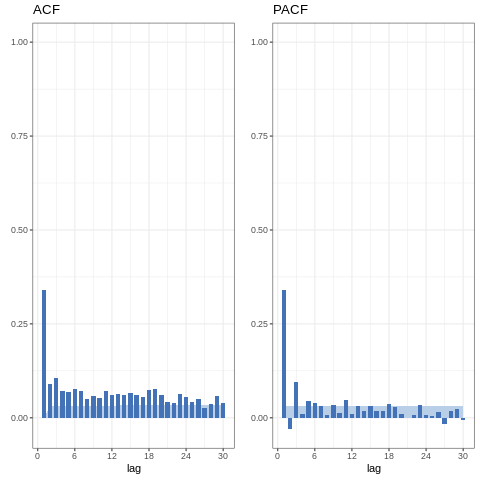

In [25]:
#@title #### **Precipitation Autocorrelation Simple and Partial**
%%R
ggplot.corr(data = Datam$PRECIPITATION, lag.max = 30, ci= 0.95, large.sample.size = TRUE, horizontal = TRUE)

In [26]:
## Statitionary Tests
%%R

# Unit-Root Tests
# Augmented Dickey–Fuller test
trend<-summary(ur.df(ts(Datam[,5]), type="trend", selectlags = "AIC"))  
drift<-summary(ur.df(ts(Datam[,5]), type="drift", selectlags = "AIC"))  
none<-summary(ur.df(ts(Datam[,5]), type="none", selectlags = "AIC"))    

trendt<-trend@testreg$coefficients[13] # p value
driftt<-drift@testreg$coefficients[10] # p value
nonet<-none@testreg$coefficients[7]    # p value

# Phillips-Perron test
pp<-PP.test(ts(Datam[,5]), lshort = "FALSE")  ## PP also applied for cheking response ADF
ppt<-pp[["p.value"]]  # p value

print(trendt)
print(driftt)
print(nonet)
print(ppt)

[1] 2.733439e-55
[1] 6.082949e-105
[1] 3.507061e-160
[1] 0.01


<p align="justify">Through the stationarity tests we can statistically check that the data do not present unit-root processes and therefore we are probably dealing with a stationary series.<p>

***

**<h2><center> Precipitation ARIMA modeling</center></h2>**

### **1. Parameter Identification**

In this step the goal is to find the appropriate values $p$, $d$, and $q$.

In [27]:
# Transform data train into time-series data type
%%R
Datam<-ts(Datam[,5]) # Data seleccionada para la generación de los modelos

<p align="justify">We will try multiple ($p$, $d$) combinations to identify the best model. For selecting the best model we will use the Akaike information criterion (AIC), that express the relative quality of statistical models for certain dataset.<p>

In [28]:
%%R
AIC<- data.frame(matrix(0, 100, 4))

colnames(AIC)<-c("p", "d","q", "AIC")
order<-matrix(0, 1 ,3)

k<-1
for (i in 0:9) {
  for (j in 0:9) {
    arm<-arima(ts(Datam), order = c(i,0,j), include.mean = TRUE)
    AIC[k,1]<-i
    AIC[k,3]<-j
    AIC[k,4]<-arm$aic
    k<-k+1
  }
}
#print(AIC)

#### Best ($p$, $d$, $q$) parameters

It is necessary to clarify that since the model is stationary, it does not need to differentiate the series. The best model through AIC is ARIMA(4,0,5).

In [29]:
# Best ARIMA model
%%R
print(AIC[which.min(AIC[1:100,4]),1:4])
order<-AIC[which.min(AIC[1:100,4]),1:3]

   p d q     AIC
46 4 0 5 25549.4


### **2. Parameter Estimation**

<p align="justify"> This step look for identify $p$, $d$, $q$ proper values for the ARIMA modeling . <p>

In [30]:
%%R
modelarm<-arima(Datam, order = c(order[,1],order[,2],order[,3]), include.mean = TRUE)
print(modelarm)


Call:
arima(x = Datam, order = c(order[, 1], order[, 2], order[, 3]), include.mean = TRUE)

Coefficients:
         ar1      ar2      ar3     ar4     ma1     ma2     ma3      ma4
      0.1802  -0.1194  -0.0106  0.8570  0.1607  0.0965  0.1067  -0.8277
s.e.  0.0779   0.0866   0.0826  0.0745  0.0809  0.0588  0.0550   0.0447
          ma5  intercept
      -0.2489     3.7898
s.e.   0.0329     0.2817

sigma^2 estimated as 33.64:  log likelihood = -12764.7,  aic = 25549.4


### **3. Residuals Diagnosis**

<p align="justify">Through the autocorrelation (simple and partial) and residual plots we can observe that the model residuals are white noise. The white noise behavior is also checked through the Ljung-Box test with a p-value>0.05 accepting the null hypothesis.<p>

NULL


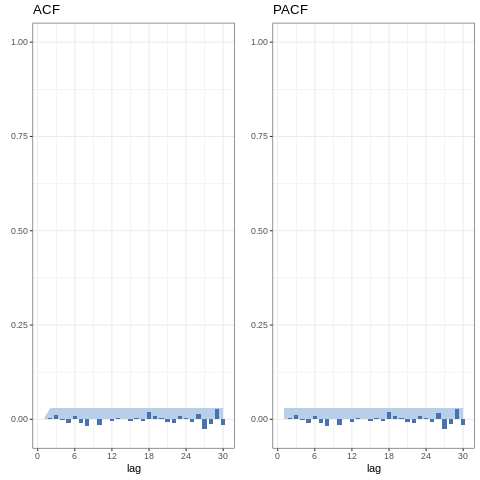

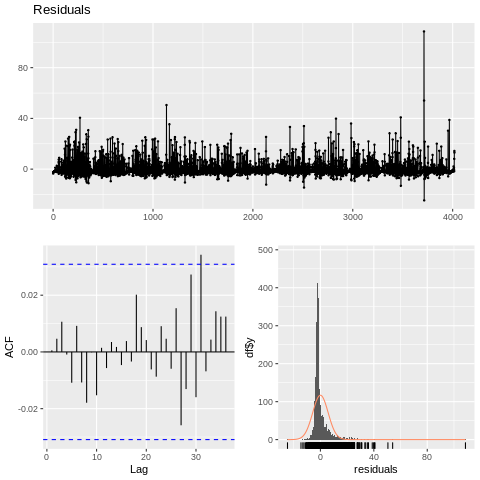

In [31]:
%%R
line<-matrix(1:4018)
residuals<-data.frame(line, modelarm$residuals)
plot(ggplot.corr(data = residuals$modelarm.residuals, lag.max = 30, ci= 0.95, large.sample.size = TRUE, horizontal = TRUE))
print(checkresiduals(residuals$modelarm.residuals))

In [32]:
%%R
print(var(residuals$modelarm.residuals))
print(mean(residuals$modelarm.residuals))
print(Box.test(modelarm$residuals, type = "Ljung", lag = 30 )$p.value)

[1] 33.64953
[1] 0.009468026
[1] 0.9834485


### **4. Forecast**

This section addresses the process of predicting 31 future data using the validated model.

In [33]:
%%R
mo<-predict(modelarm, 31)$pred
mean(mo)

[1] 3.992129


Estimation of fit metrics (MSE and MAE)

In [34]:
# Model errors
%%R
armmse<-sum((Datap[1:31,5]-predict(modelarm, 31)$pred)^2)/31
armmae<-sum(abs(Datap[1:31,5]-predict(modelarm, 31)$pred))/31
print(armmse)
print(armmae)

[1] 12.01988
[1] 2.775815


***

**<h2><center> Precipitation Artificial Neural Network model</center></h2>**

<p align="justify"> An artificial feed-forward model for time series is fitted below. The model uses lagged variables from the series as input variables and fits a neural network with three layers. The first layer selects the appropriate lags using the AIC function. The second layer contains half of the input variables +1. The last layer has the output layer corresponding to the future value of the series.

Before starting to fit the neural network, the data is scaled in the range [0-1] to generate a suitable and more efficient model fit. <p>

In [35]:
# Normalization
%%R 
Datamann<-(Datam-min(Datam))/(max(Datam)-min(Datam))

In [36]:
# Model fit using 100 iterations
%%R 
annmo<-nnetar(Datamann, repeats=100)
annmo

Series: Datamann 
Model:  NNAR(19,10) 
Call:   nnetar(y = Datamann, repeats = 100)

Average of 100 networks, each of which is
a 19-10-1 network with 211 weights
options were - linear output units 

sigma^2 estimated as 0.002189


<p align="justify"> The behavior of the residuals is analyzed to validate the model and the model residuals of various data subsets (cross-validation). With the two tests, we can see that the generated model fits the series, and therefore we have a good neural network.<p>

In [37]:
%%R
print(Box.test(annmo$residuals, type = "Ljung", lag = 30 )$p.value) # Checking residuals
CVar(Datamann, k=10, model=annmo) # Checking residuals every 10 folds

[1] 0.7201786
Series: Datamann 
Call:   CVar(y = Datamann, k = 10, model = annmo)

10-fold cross-validation
                  Mean          SD
ME        1.603225e-05 0.001715735
RMSE      4.623349e-02 0.007543958
MAE       2.841654e-02 0.001765319
MPE       1.430243e+01 4.430694386
MAPE      8.772852e+01 4.937261058
ACF1      1.379059e-02 0.045283582
Theil's U 3.476851e+00 1.318251799

p-value of Ljung-Box test of residuals is  0.6642067 
if this value is significant (<0.05),
the result of the cross-validation should not be used
as the model is underfitting the data.


In [38]:
%%R
annmodel<-nnetar(Datamann, repeats=1, model=annmo) # Saving the model weigths

The behavior of the next 31 future days of the series is predicted using the validated model.

In [39]:
%%R
fannmo<-forecast(annmo, 31)
fannmo<-fannmo$mean*(max(Datam)-min(Datam))+min(Datam)

Estimation of fit metrics (MSE and MAE)

In [40]:
%%R
# Model errors
annmse<-sum((Datap[1:31,5]-fannmo)^2)/31
annmae<-sum(abs(Datap[1:31,5]-fannmo))/31
print(annmse)
print(annmae)

[1] 33.54571
[1] 4.966846


***

**<h2><center> Precipitation Hybrid model</center></h2>**

<p align="justify"> For the model construction we use the same developed ARIMA model, but adding a neural network to the residuals obtained with ARIMA. Firtsly we normalized the ARIMA residuals. <p>

In [41]:
%%R
hdata<- (modelarm$residuals-min(modelarm$residuals))/(max(modelarm$residuals)-min(modelarm$residuals))

Fitting ANN model

In [42]:
%%R
harn<-nnetar(hdata, repeats=100)

The behavior of the next 31 future days of the series is predicted using the validated model.

In [43]:
%%R 
# Forecasting using ARIMA
ar<-predict(modelarm, 31)$pred

# Forecasting using ANN
fhamo<-forecast(harn, 31)
fhamo<-fhamo$mean*(max(modelarm$residuals)-min(modelarm$residuals))+min(modelarm$residuals)

In [44]:
%%R
fhamo

Time Series:
Start = 4019 
End = 4049 
Frequency = 1 
 [1] -0.01484025  0.03207499  0.03199984  0.03199996  0.03199996  0.03199996
 [7]  0.03199996  0.03199996  0.03199996  0.03199996  0.03199996  0.03199996
[13]  0.03199996  0.03199996  0.03199996  0.03199996  0.03199996  0.03199996
[19]  0.03199996  0.03199996  0.03199996  0.03199996  0.03199996  0.03199996
[25]  0.03199996  0.03199996  0.03199996  0.03199996  0.03199996  0.03199996
[31]  0.03199996


Fit metrics estimation (MSE and MAE)

In [45]:
%%R
# Model errors
hmse<-sum((Datap[1:31,5]-ar+fhamo)^2)/31
hmae<-sum(abs(Datap[1:31,5]-ar+fhamo))/31
print(hmse)
print(hmae)

[1] 11.87459
[1] 2.746431


***

**<h2><center> Precipitation SARIMA model</center></h2>**

<p align="justify"> We must first identify the existence of seasonal behavior. Next, we can find that the series has a seasonal behavior of 185 days, that is, approximately every 6 months there is a pattern.<p>

[1] 184.0909


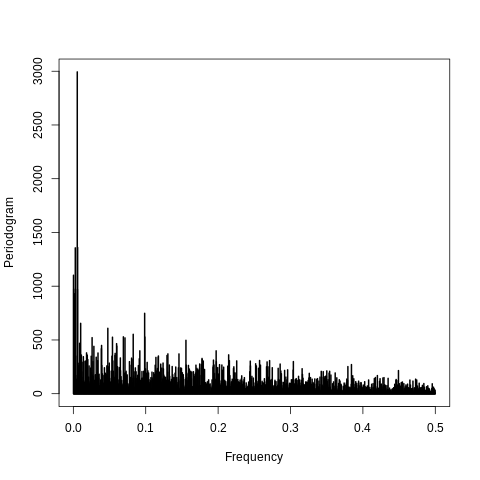

In [ ]:
%%R
pe<-periodogram(Datam)
max(pe$spec)
pe$freq[match(max(pe$spec), pe$spec)]
1/pe$freq[match(max(pe$spec), pe$spec)]

<p align="justify"> We build an ARIMA seasonal model using the same ARIMA model identified earlier but add two seasonal parameters. We only use significant lags and residuals from a period of six months ago.<p>

The behavior of the next 31 future days of the series is predicted using the model.

In [ ]:
%%R
fsarmo<-sarima.for(ts(Datam),n.ahead=31, 4, 0, 5, 1, 0, 1, 185)

Estimation of fit metrics (MSE and MAE)

In [ ]:
%%R
# Model errors
sarmmse<-sum((Datap[1:31,5]-fsarmo$pred)^2)/31
sarmmae<-sum(abs(Datap[1:31,5]-fsarmo$pred))/31
print(sarmmse)
print(sarmmae)

[1] 12.01723
[1] 2.778125


***

**<h2><center> Model Comparison using MSE and MAE metrics</center></h2>**

<p align="justify"> The generated models metrics results are presented below. These metrics are used to determine the model with the higher precision. The best will be used later to generate scenarios.<p>

In [ ]:
%%R
### Models Metrics

print("ARIMA")
print(armmse)
print(armmae)

print("ANN feed forward")
print(annmse)
print(annmae)

print("Hybrid model")
print(hmse)
print(hmae)

print("SARIMA")
print(sarmmse)
print(sarmmae)

[1] "ARIMA"
[1] 12.01988
[1] 2.775815
[1] "ANN feed forward"
[1] 34.95358
[1] 5.095623
[1] "Hybrid model"
[1] 11.90731
[1] 2.748152
[1] "SARIMA"
[1] 12.01723
[1] 2.778125


<p align="justify"> However, when checking predicted data behavior with the neural network in the hybrid model, we observe that the predicted data only occur as constant data. Therefore, considering the principle of parsimony, we decided to work with the developed ARIMA model and generate the scenario through this model.<p>

**<h2><center> ARIMA Model Simulation </center></h2>**

Dataset for saving escenarios

In [151]:
%%R
SIM<-matrix(0, 181, 200)

ARIMA model and Scenario Generation

In [167]:
# Scenario Generation
%%R
intercept=3.7898
for (i in 1:200) {
     SIM[,i]<-arima.sim(list(ar = c(0.1802, -0.1194, -0.0106, 0.8570), ma = c(0.1607, 0.0965, 0.1067, -0.8277, -0.2489)), mean=intercept, n=181, sd=5.7)
}

In [168]:
# Converting all negative values to zero
%%R
SIM<-pmax(SIM, 0)

Scenario Generation path saving

In [170]:
# Data saving
%%R
SIM<-data.frame(SIM)

In [171]:
%%R
WriteXLS(SIM, "SIM.xlsx")

Scenarios plot

In [175]:
%%R
plt<-read_excel("/content/drive/MyDrive/Materias Maestria/Tercer Semestre/Scenario Generation/SIM.xlsx")

In [177]:
# Serie for plotting
%%R
t<-c(1:181)
plt<-data.frame(t, plt)

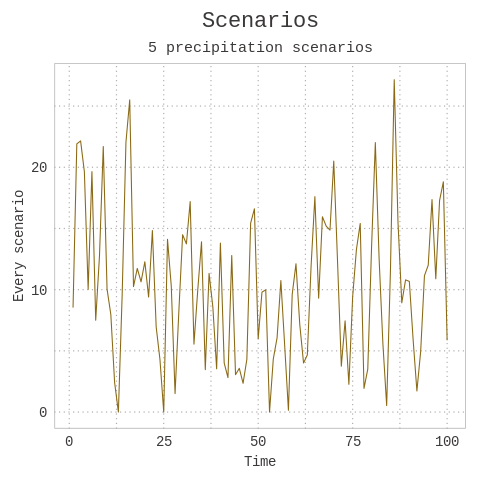

In [180]:
%%R
# Scenario presentation
ggplot(plt[1:100,], aes(x=t)) +labs(title="Scenarios", subtitle="5 precipitation scenarios", x = "Time" , y = "Every scenario")+
  geom_line(aes(y = X1), color = "darkred") + 
  geom_line(aes(y = X2), color="steelblue") +
  geom_line(aes(y = X3), color = "seagreen") + 
  geom_line(aes(y = X4), color="deeppink4") +
  geom_line(aes(y = X5), color="goldenrod4") +theme_elegante()

## **References**

1. Box, G. E. P., & Jenkins, G. M. (1976). Time series analysis: Forecasting and control. San Francisco: Holden-Day
2. Dickey, D. A., & Fuller, W. A. (1979). Distribution of the Estimators for Autoregressive Time Series With a Unit Root. Journal of the American Statistical Association, 74(366), 427–431. https://doi.org/10.2307/2286348
3. Gujarati, D. N., & Porter, D. C. (2010). Econometria. In McGraw-Hill.
4. Ljung, G., & Box, G. (1978). On a Measure of Lack of Fit in Time Series Models. Biometrika, 65. https://doi.org/10.1093/biomet/65.2.297
5. Phillips, P., & Perron, P. (1986). Testing for a Unit Root in Time Series Regression. Cowles Foundation, Yale University, Cowles Foundation Discussion Papers, 75. https://doi.org/10.1093/biomet/75.2.335
6. Svozil, D., Kvasnicka, V., & Pospichal, J. (1997). Introduction to multi-layer feed-forward neural networks. Chemometrics and Intelligent Laboratory Systems, 39(1), 43–62. https://doi.org/https://doi.org/10.1016/S0169-7439(97)00061-0
7. Yasrebi, S. S., & Emami, M. (2008). Application of Artificial Neural Networks (ANNs) in prediction and Interpretation of Pressuremeter Test Results.
8. Zhang, G. P. (2003). Time series forecasting using a hybrid ARIMA and neural network model. In Neurocomputing (Vol. 50). www.elsevier.com/locate/neucom